#  K Means clustering

In [2]:
# Clustering algorithm used in unsupervised data and data needs to be grouped into clusters
# no information on target variable
# K means helps in identifying clusters

In [3]:
# First step if define 'K' or cluster points which will become centroid of the cluster or center of gravity

In [4]:
# Second step is to compute the distance of every point in the cluster with its centroid or 'K'

In [5]:
# Third step is adjust the 'K' so that it becomes perfect center of gravity of the cluster

In [6]:
# Fourth step is to again and again adjusting the 'K' location for center of gravity untill the points stop changing clusters

In [7]:
# SSE or Sum of squared Errors
# Complute the distance of each point with its centroid or 'K = 1,2,3...', square it and then sum it up
# It would be calculated separately for each cluster
# SSE = SSE1 + SSE2 + .....+ SSEn

In [8]:
# Ploting the SSE as scatter plot makes an elbow chart where elbow joint the good 'K' number

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()

In [38]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [39]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [41]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
df.drop(['petal length (cm)','petal width (cm)','flower'],axis = 'columns',inplace = True)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [43]:
km = KMeans(n_clusters= 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [45]:
df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


Text(0, 0.5, 'Sepal Width')

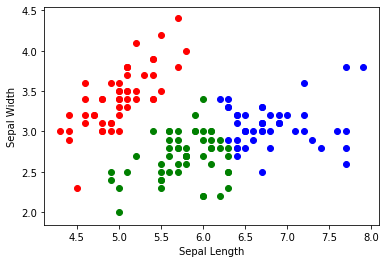

In [46]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [47]:
# Close-ness of data points show the inconsistency in scaling of variables 
# To remove that, we need to use Scaling like MinMaxScalar

In [48]:
scalar = MinMaxScaler()
scalar.fit(df[['sepal length (cm)']])
df[['sepal length (cm)']] = scalar.transform(df[['sepal length (cm)']])

scalar.fit(df[['sepal width (cm)']])
df[['sepal width (cm)']] = scalar.transform(df[['sepal width (cm)']])
df

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0
5,0.305556,0.791667,0
6,0.083333,0.583333,0
7,0.194444,0.583333,0
8,0.027778,0.375000,0
9,0.166667,0.458333,0


In [49]:
km = KMeans(n_clusters=3)

In [50]:
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [51]:
# 'K' or centroids
km.cluster_centers_

array([[ 4.09329140e-01,  2.88522013e-01,  2.00000000e+00],
       [ 1.96111111e-01,  5.95000000e-01, -8.88178420e-16],
       [ 6.97990544e-01,  4.47695035e-01,  1.00000000e+00]])

Text(0, 0.5, 'Sepal Width')

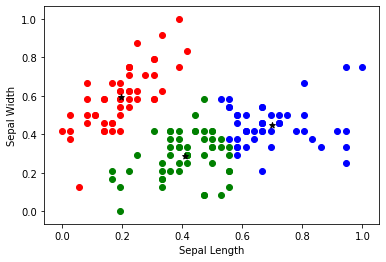

In [52]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker = '*')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [53]:
# Since the difference in range in both the columns is less, no appreciable change in scatter plot

In [54]:
# Elbow plot method
# Finding the value of 'K' located at the elbow joint

In [70]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_) # km.inertia gives the sum of squared error

In [71]:
sse

[115.73775720164608,
 31.861327160493826,
 4.244570267778816,
 3.3154126198711698,
 2.747830163545046,
 2.1913468174940114,
 1.872684544838684,
 1.6708507863021747,
 1.3812989351183793]

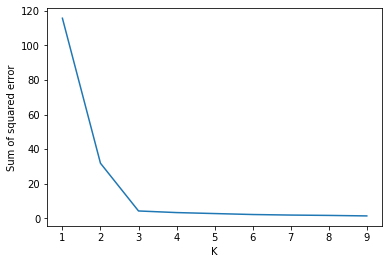

In [72]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
# From above plot it shows K = 3, means 3 clusters best result